In [1]:
#Necessary librarys
import os
import random

import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew

import matplotlib.pyplot as plt
import seaborn as sns
import squarify

import json
from pandas.io.json import json_normalize # 이것의 사용법은 더 자세히 봐야겠음

plt.style.use('fivethirtyeight')

## Transformation Json format

In [2]:
columns = ['device', 'geoNetwork', 'totals', 'trafficSource']
dir_path  ="../../Kaggle_data/Google_Analytics/"

In [3]:
p = 0.1 #random seaprater in train data

# Json to table code
def json_read(df):
    data_frame = dir_path + df
    
    df = pd.read_csv(data_frame, 
                     converters={column : json.loads for column in columns}, 
                     dtype={'fullVisitorId' : 'str'}, 
                     skiprows= lambda i : i>0 and random.random()>p)
    
    for column in columns:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = ["{column}.{subcolumn}".format(column = column, subcolumn = subcolumn) for subcolumn in column_as_df.columns]
        df = df.drop(column, axis = 1).merge(column_as_df, right_index = True, left_index = True)
        
    print("Loaded {base_name}. Shape: {shape}".format(base_name = os.path.basename(data_frame), shape = df.shape))
    return df

In [4]:
%%time
df_train = json_read("train.csv.zip")

Loaded train.csv.zip. Shape: (90067, 54)
CPU times: user 13 s, sys: 295 ms, total: 13.3 s
Wall time: 13.3 s


In [5]:
df_train.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,...,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20160902,537222803633850821,537222803633850821_1472812602,Not Socially Engaged,1472812602,1,1472812602,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
1,Organic Search,20160902,3293772317640873624,3293772317640873624_1472808002,Not Socially Engaged,1472808002,1,1472808002,Firefox,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
2,Organic Search,20160902,1283542838194038522,1283542838194038522_1472885255,Not Socially Engaged,1472885255,1,1472885255,Safari,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
3,Organic Search,20160902,8385778325939846892,8385778325939846892_1472836625,Not Socially Engaged,1472836625,1,1472836625,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,www google store,organic,NaN,google
4,Organic Search,20160902,8720204952657722494,8720204952657722494_1472832336,Not Socially Engaged,1472832336,1,1472832336,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google


## missing vlaues

In [6]:
def missin_values(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/ data.isnull().count() * 100).sort_values(ascending = False)
    df = pd.concat([total, percent], axis = 1, keys=['Total', 'Percent'])
    
    return df[~(df['Total'] == 0 )]

In [7]:
missin_values(df_train)

,Total,Percent
trafficSource.adContent,88985,98.798672
totals.transactionRevenue,88931,98.738717
trafficSource.adwordsClickInfo.adNetworkType,87901,97.595124
trafficSource.adwordsClickInfo.slot,87901,97.595124
trafficSource.adwordsClickInfo.page,87901,97.595124
trafficSource.adwordsClickInfo.isVideoAd,87901,97.595124
trafficSource.adwordsClickInfo.gclId,87893,97.586241
trafficSource.isTrueDirect,62824,69.752518
trafficSource.referralPath,57153,63.456094
trafficSource.keyword,50010,55.525331


In [8]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90067 entries, 0 to 90066
Data columns (total 54 columns):
channelGrouping                                      90067 non-null object
date                                                 90067 non-null int64
fullVisitorId                                        90067 non-null object
sessionId                                            90067 non-null object
socialEngagementType                                 90067 non-null object
visitId                                              90067 non-null int64
visitNumber                                          90067 non-null int64
visitStartTime                                       90067 non-null int64
device.browser                                       90067 non-null object
device.browserSize                                   90067 non-null object
device.browserVersion                                90067 non-null object
device.deviceCategory                                90067 non-null ob

In [9]:
df_train.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,...,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20160902,537222803633850821,537222803633850821_1472812602,Not Socially Engaged,1472812602,1,1472812602,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
1,Organic Search,20160902,3293772317640873624,3293772317640873624_1472808002,Not Socially Engaged,1472808002,1,1472808002,Firefox,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
2,Organic Search,20160902,1283542838194038522,1283542838194038522_1472885255,Not Socially Engaged,1472885255,1,1472885255,Safari,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
3,Organic Search,20160902,8385778325939846892,8385778325939846892_1472836625,Not Socially Engaged,1472836625,1,1472836625,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,www google store,organic,NaN,google
4,Organic Search,20160902,8720204952657722494,8720204952657722494_1472832336,Not Socially Engaged,1472832336,1,1472832336,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google


In [10]:
def date_process(df):
    df['date'] = df['date'].astype(str)
    df['date'] = df['date'].apply(lambda x : x[:4] + "-" + x[4:6] + "-" + x[6:])
    df['date'] = pd.to_datetime(df['date'])
    df['weekday'] = df['date'].dt.weekday
    df['yeadr'] = df['date'].dt.year
    df['day'] = df['date'].dt.day
    df['month'] = df['date'].dt.month
    
    return df

In [11]:
df_train = date_process(df_train)
df_train.head(2)

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,...,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,weekday,yeadr,day,month
0,Organic Search,2016-09-02,537222803633850821,537222803633850821_1472812602,Not Socially Engaged,1472812602,1,1472812602,Chrome,not available in demo dataset,...,(not set),NaN,(not provided),organic,NaN,google,4,2016,2,9
1,Organic Search,2016-09-02,3293772317640873624,3293772317640873624_1472808002,Not Socially Engaged,1472808002,1,1472808002,Firefox,not available in demo dataset,...,(not set),NaN,(not provided),organic,NaN,google,4,2016,2,9


## Numeric value attention

In [12]:
from sklearn import preprocessing

In [13]:
# trafficSource.adContent	89455	98.750373
# totals.transactionRevenue	89402	98.691865
# trafficSource.adwordsClickInfo.adNetworkType	88401	97.586850
# trafficSource.adwordsClickInfo.slot	88401	97.586850
# trafficSource.adwordsClickInfo.page	88401	97.586850
# trafficSource.adwordsClickInfo.isVideoAd	88401	97.586850
# trafficSource.adwordsClickInfo.gclId	88395	97.580227
# trafficSource.isTrueDirect	63296	69.873161
# trafficSource.referralPath	57550	63.530087
# trafficSource.keyword	50260	55.482575
# totals.bounces	45692	50.439909
# totals.newVisits	19896	21.963416
# totals.pageviews	12	0.013247

In [14]:
def num_treat(df):
    df['totals.pageviews'] .fillna(1, inplace = True)
    df['totals.newVisits'] .fillna(0, inplace = True)
    df['totals.bounces'] .fillna(0, inplace = True)
    df['totals.pageviews']  = df['totals.pageviews'].astype(int)
    df['totals.newVisits']  = df['totals.newVisits'].astype(int)
    df['totals.bounces']  = df['totals.bounces'].astype(int)
    
    df['trafficSource.isTrueDirect'].fillna(False, inplace =True)
    return df

In [15]:
df_train = num_treat(df_train)

In [16]:
df_train.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,...,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,weekday,yeadr,day,month
0,Organic Search,2016-09-02,537222803633850821,537222803633850821_1472812602,Not Socially Engaged,1472812602,1,1472812602,Chrome,not available in demo dataset,...,(not set),False,(not provided),organic,NaN,google,4,2016,2,9
1,Organic Search,2016-09-02,3293772317640873624,3293772317640873624_1472808002,Not Socially Engaged,1472808002,1,1472808002,Firefox,not available in demo dataset,...,(not set),False,(not provided),organic,NaN,google,4,2016,2,9
2,Organic Search,2016-09-02,1283542838194038522,1283542838194038522_1472885255,Not Socially Engaged,1472885255,1,1472885255,Safari,not available in demo dataset,...,(not set),False,(not provided),organic,NaN,google,4,2016,2,9
3,Organic Search,2016-09-02,8385778325939846892,8385778325939846892_1472836625,Not Socially Engaged,1472836625,1,1472836625,Chrome,not available in demo dataset,...,(not set),False,www google store,organic,NaN,google,4,2016,2,9
4,Organic Search,2016-09-02,8720204952657722494,8720204952657722494_1472832336,Not Socially Engaged,1472832336,1,1472832336,Chrome,not available in demo dataset,...,(not set),False,(not provided),organic,NaN,google,4,2016,2,9


### take off unique value (Just one value)

In [17]:
df_train['channelGrouping'].nunique()

8

In [18]:
clean_consts = [col for col in df_train.columns if df_train[col].nunique() == 1]

df_train.drop(clean_consts, axis=1, inplace=True)

print("This will drop : ", len(clean_consts), "columns")
print("Dropped columns : \n", clean_consts)

This will drop :  21 columns
Dropped columns : 
 ['socialEngagementType', 'device.browserSize', 'device.browserVersion', 'device.flashVersion', 'device.language', 'device.mobileDeviceBranding', 'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName', 'device.mobileDeviceModel', 'device.mobileInputSelector', 'device.operatingSystemVersion', 'device.screenColors', 'device.screenResolution', 'geoNetwork.cityId', 'geoNetwork.latitude', 'geoNetwork.longitude', 'geoNetwork.networkLocation', 'totals.visits', 'trafficSource.adwordsClickInfo.adNetworkType', 'trafficSource.adwordsClickInfo.criteriaParameters', 'trafficSource.adwordsClickInfo.isVideoAd']


In [19]:
df_train.nunique()

channelGrouping                             8
date                                      366
fullVisitorId                           85425
sessionId                               90058
visitId                                 89911
visitNumber                               210
visitStartTime                          89919
device.browser                             29
device.deviceCategory                       3
device.isMobile                             2
device.operatingSystem                     15
geoNetwork.city                           541
geoNetwork.continent                        6
geoNetwork.country                        196
geoNetwork.metro                           82
geoNetwork.networkDomain                 7250
geoNetwork.region                         334
geoNetwork.subContinent                    22
totals.bounces                              2
totals.hits                               161
totals.newVisits                            2
totals.pageviews                  

In [20]:
df_train['totals.hits'].dtype

dtype('O')

## Searching all categories

In [21]:
columns_categorical = [
    'channelGrouping','device.browser', 'device.deviceCategory',
    'device.isMobile', 'device.operatingSystem', 'geoNetwork.city',
    'geoNetwork.continent', 'geoNetwork.country', 'geoNetwork.metro',
    'geoNetwork.networkDomain', 'geoNetwork.region', 'geoNetwork.subContinent',
    'trafficSource.adContent', 'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
    'trafficSource.medium', 'trafficSource.source'
]

for column in columns_categorical:
    print(column, ':  ', df_train[column].unique())
    print("")

channelGrouping :   ['Organic Search' 'Referral' 'Affiliates' 'Direct' 'Social' 'Display'
 'Paid Search' '(Other)']

device.browser :   ['Chrome' 'Firefox' 'Safari' 'Edge' 'Opera Mini' 'Opera'
 'Mozilla Compatible Agent' 'Internet Explorer' 'Coc Coc'
 'Safari (in-app)' 'Android Webview' 'YaBrowser' 'UC Browser'
 'Amazon Silk' 'Android Browser' 'Nintendo Browser' 'BlackBerry' 'Maxthon'
 'MRCHROME' 'Nokia Browser' 'M5' 'Iron' 'Puffin' 'DASH_JR_3G'
 'Apple-iPhone7C2' 'Seznam' '0' 'LYF_LS_4002_12' '(not set)']

device.deviceCategory :   ['desktop' 'mobile' 'tablet']

device.isMobile :   [False  True]

device.operatingSystem :   ['Windows' 'Macintosh' 'Android' 'Chrome OS' 'iOS' 'Linux' '(not set)'
 'Windows Phone' 'Nintendo Wii' 'BlackBerry' 'Samsung' 'Firefox OS'
 'Nintendo WiiU' 'Xbox' 'OpenBSD']

geoNetwork.city :   ['Brisbane' 'not available in demo dataset' 'Mexico City' 'Dublin'
 '(not set)' 'Madrid' 'Bengaluru' 'Rio de Janeiro' 'Los Angeles'
 'New Delhi' 'Seattle' 'Buenos Aires' 'Lo

In [22]:
def Normalize(df) : 
    df['totals.hits'] = df['totals.hits'].astype(float)
    df['totals.hits'] = preprocessing.MinMaxScaler(df['totals.hits'])
    
    df['totals.pageviews'] = preprocessing.MinMaxScaler(df['totals.pageviews'])
    
    df['totals.transactionRevenue'] = df['totals.transactionRevenue'].astype(float)
    df['totals.transactionRevenue'] = df['totals.transactionRevenue'].fillna(0.0)
    df['totals.transactionRevenue_log'] = np.log(df[
                df['totals.transactionRevenue'] > 0]['totals.transactionRevenue'] + 0.01)
    
    return df

In [23]:
df_train = Normalize(df_train)

In [24]:
print("Transaction Revenue Min Value : ",
     df_train[df_train['totals.transactionRevenue']> 0]['totals.transactionRevenue'].min())
print("Transaction Revenue Mean Value : ",
     df_train[df_train['totals.transactionRevenue']> 0]['totals.transactionRevenue'].mean())
print("Transaction Revenue Median Value : ",
     df_train[df_train['totals.transactionRevenue']> 0]['totals.transactionRevenue'].median())
print("Transaction Revenue Max Value : ",
     df_train[df_train['totals.transactionRevenue']> 0]['totals.transactionRevenue'].max())

Transaction Revenue Min Value :  90000.0
Transaction Revenue Mean Value :  127983433.09859155
Transaction Revenue Median Value :  48565000.0
Transaction Revenue Max Value :  4198500000.0


In [25]:
df_train['totals.transactionRevenue'].values

array([0., 0., 0., ..., 0., 0., 0.])

In [26]:
df_train['totals.transactionRevenue_log'].isnull().sum()

88931

In [27]:
df_train.shape

(90067, 38)

/home/jeongchanwoo/miniconda3/envs/ml_python_linux/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


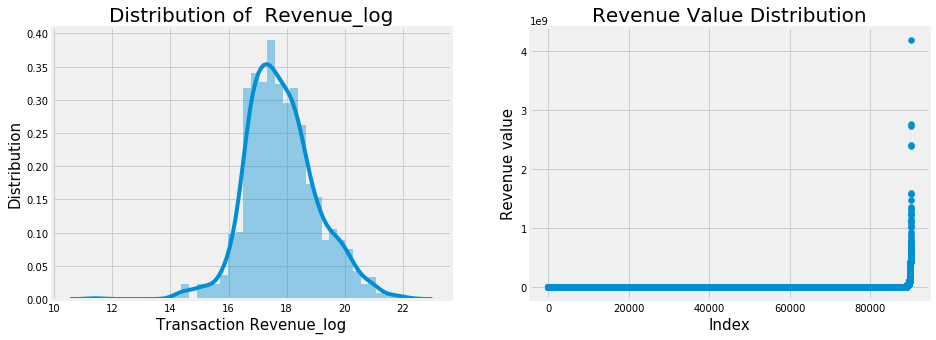

In [28]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
ax = sns.distplot(np.log(df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"] + 0.01)
                  , bins = 40, kde= True)
ax.set_xlabel('Transaction Revenue_log', fontsize = 15)
ax.set_ylabel('Distribution', fontsize = 15)
ax.set_title('Distribution of  Revenue_log', fontsize = 20)

plt.subplot(1,2,2)
plt.scatter(range(df_train.shape[0]), np.sort(df_train['totals.transactionRevenue'].values))
plt.xlabel('Index', fontsize =15)
plt.ylabel('Revenue value', fontsize=15)
plt.title("Revenue Value Distribution", fontsize =20)

plt.show()

### 첨도(Kurtosis), 왜도(Skewness) 측정
* 첨도는 0에 근사할 수록 정규분포에 근사한다.
<br>분포값이 0초과일 경우 점차 뾰족해진다.
![첨도(Kurtosis)](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e6/Standard_symmetric_pdfs.png/300px-Standard_symmetric_pdfs.png)
* 왜도는 0에 근사할 수록 정규분포에 근사한다.(-0.5 ~ 0.5를 이상적인 값으로 여김)
<br>분포값이 음수일 경우 오른쪽에 많은 값이 있음, 왼쪽으로 긴꼬리. 
<br>분포값이 양수일 경우 왼쪽에 많은 값이 있음, 오른쪽으로 긴꼬리.
![왜도(Skewness)](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg/350px-Negative_and_positive_skew_diagrams_%28English%29.svg.png)

In [29]:
print('Excess Kurtosis of normal distribution : {}'.format(
    kurtosis(df_train[df_train['totals.transactionRevenue_log']>0]['totals.transactionRevenue_log'])))
print('Skewness of normal distribution : {}'.format(
    skew(df_train[df_train['totals.transactionRevenue_log']>0]['totals.transactionRevenue_log'])))

Excess Kurtosis of normal distribution : 1.0270292150530898
Skewness of normal distribution : 0.23694643243567046


## Device Browsers


Percntual of browser usage : 
Chrome               61721
Safari               18323
Firefox               3701
Internet Explorer     1936
Edge                  1017
Android Webview        769
Safari (in-app)        688
Opera Mini             583
Opera                  522
UC Browser             233
Name: device.browser, dtype: int64


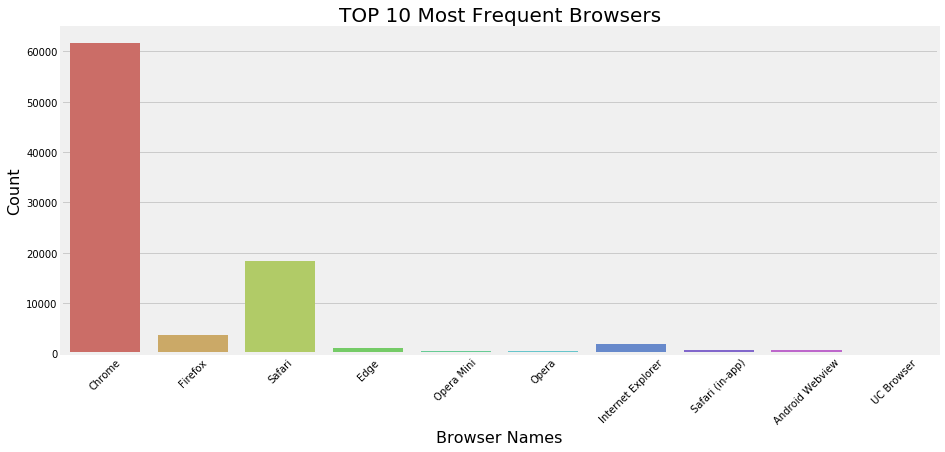

In [30]:
# top 10 of browser percent
print("Percntual of browser usage : ")
print(df_train['device.browser'].value_counts().sort_values(ascending = False)[:10])

plt.figure(figsize=(14,6))

sns.countplot(df_train[df_train['device.browser']\
                       .isin(df_train['device.browser']\
                             .value_counts()[:10].index.values)]['device.browser'], palette = 'hls')

plt.title("TOP 10 Most Frequent Browsers", fontsize = 20)
plt.xlabel("Browser Names", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.xticks(rotation =45)#x축 라벨 회전
plt.show()

In [31]:
df_train['device.browser'].value_counts()[:10].index.values

array(['Chrome', 'Safari', 'Firefox', 'Internet Explorer', 'Edge',
       'Android Webview', 'Safari (in-app)', 'Opera Mini', 'Opera',
       'UC Browser'], dtype=object)

In [32]:
df_train[df_train['device.browser'].isin(df_train['device.browser'].value_counts()[:10].index.values)]['device.browser']

0                   Chrome
1                  Firefox
2                   Safari
3                   Chrome
4                   Chrome
5                   Chrome
6                   Chrome
7                   Safari
8                   Chrome
9                   Chrome
10                  Chrome
11                  Chrome
12                  Safari
13                  Chrome
14                  Chrome
15                  Chrome
16                  Chrome
17                  Safari
18                  Chrome
19                  Chrome
20                  Chrome
21                  Chrome
22                  Chrome
23                  Chrome
24                  Chrome
25                  Chrome
26                  Chrome
27                  Chrome
28                    Edge
29                  Chrome
               ...        
90037               Chrome
90038               Chrome
90039               Chrome
90040               Chrome
90041    Internet Explorer
90042               Chrome
9

### Revenue and Browser

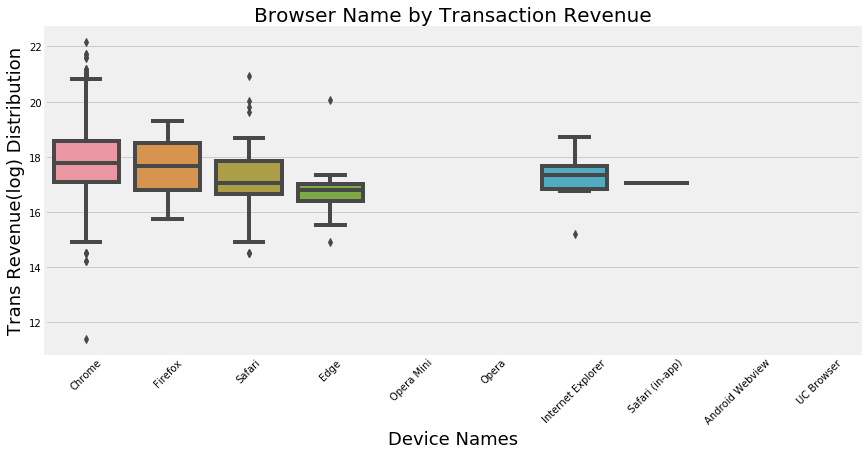

In [33]:
plt.figure(figsize=(13,6))

g1 = sns.boxplot(x = 'device.browser', y= 'totals.transactionRevenue_log',
                data = df_train[df_train['device.browser']\
                                .isin(df_train['device.browser']\
                                      .value_counts()[:10].index.values)])


g1.set_title('Browser Name by Transaction Revenue', fontsize =20)
g1.set_xticklabels(g1. get_xticklabels(), rotation = 45)
g1.set_xlabel('Device Names', fontsize=18)
g1.set_ylabel('Trans Revenue(log) Distribution', fontsize = 18)

plt.show()

### Channel Grouping

In [34]:
df_train['channelGrouping'].unique()

array(['Organic Search', 'Referral', 'Affiliates', 'Direct', 'Social',
       'Display', 'Paid Search', '(Other)'], dtype=object)

In [35]:
print("Percentual of Channel Grouping used : ")
print((df_train['channelGrouping'].value_counts()[:7]))

Percentual of Channel Grouping used : 
Organic Search    38133
Social            22502
Direct            14204
Referral          10414
Paid Search        2547
Affiliates         1624
Display             629
Name: channelGrouping, dtype: int64


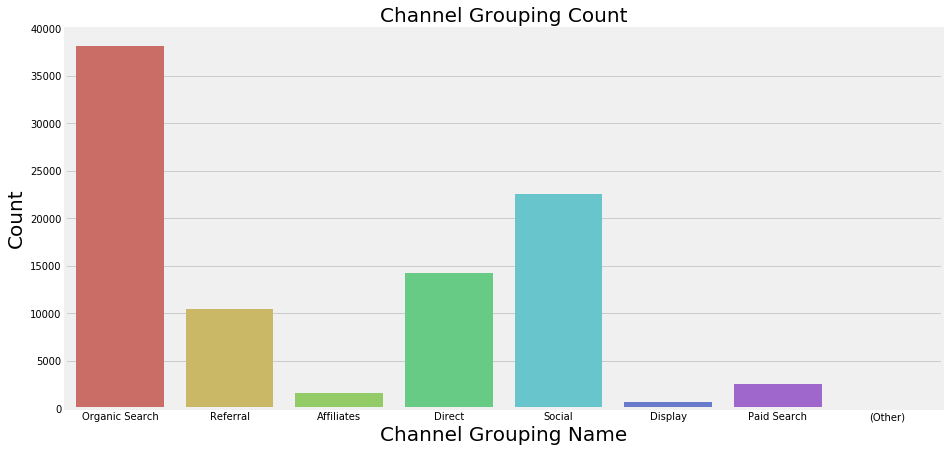

In [36]:
plt.figure(figsize=(14,7))
sns.countplot(df_train['channelGrouping'], palette='hls')
plt.title("Channel Grouping Count", fontsize =20)
plt.xlabel("Channel Grouping Name", fontsize =20)
plt.ylabel("Count", fontsize =20)
plt.show()

### Crossing Channel Grouping and Browsers
* 참신한 방법인듯

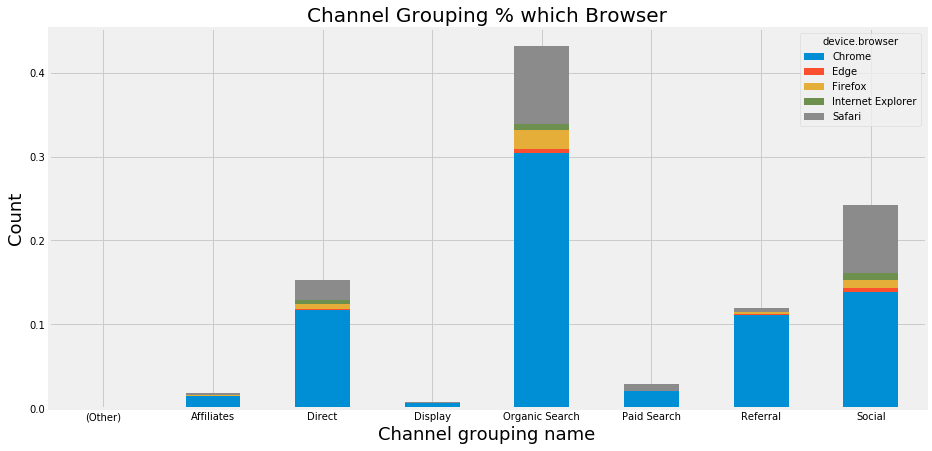

In [38]:
crosstab_eda = pd.crosstab(index = df_train['channelGrouping'], normalize=True, columns=df_train[df_train['device.browser']\
                                                                                                 .isin(df_train['device.browser'].value_counts()[:5]\
                                                                                                       .index.values)]['device.browser'])


crosstab_eda.plot(kind=  'bar', figsize = (14,7), stacked = True)
plt.title("Channel Grouping % which Browser", fontsize = 20)
plt.xlabel("Channel grouping name", fontsize = 18)
plt.ylabel("Count", fontsize = 18)
plt.xticks(rotation = 0)
plt.show()

### Operational System

In [42]:
print("Percentual of Operational System : ")
print(df_train['device.operatingSystem'].value_counts()[:5])

Percentual of Operational System : 
Windows      34962
Macintosh    25163
Android      12293
iOS          10740
Linux         3527
Name: device.operatingSystem, dtype: int64


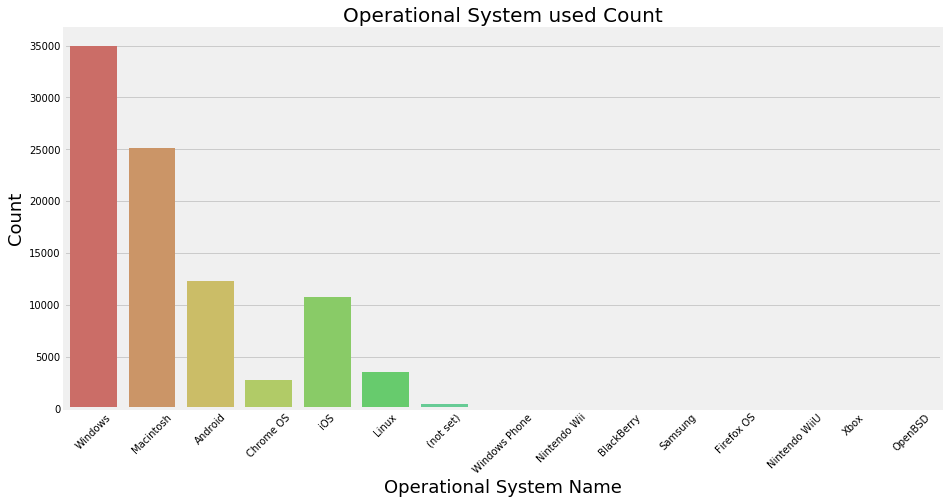

In [47]:
plt.figure(figsize=(14,7))
sns.countplot(df_train['device.operatingSystem'],palette = 'hls')
plt.title("Operational System used Count", fontsize=20)
plt.xlabel("Operational System Name", fontsize=18)
plt.ylabel("Count", fontsize= 18)
plt.xticks(rotation = 45)
plt.show()

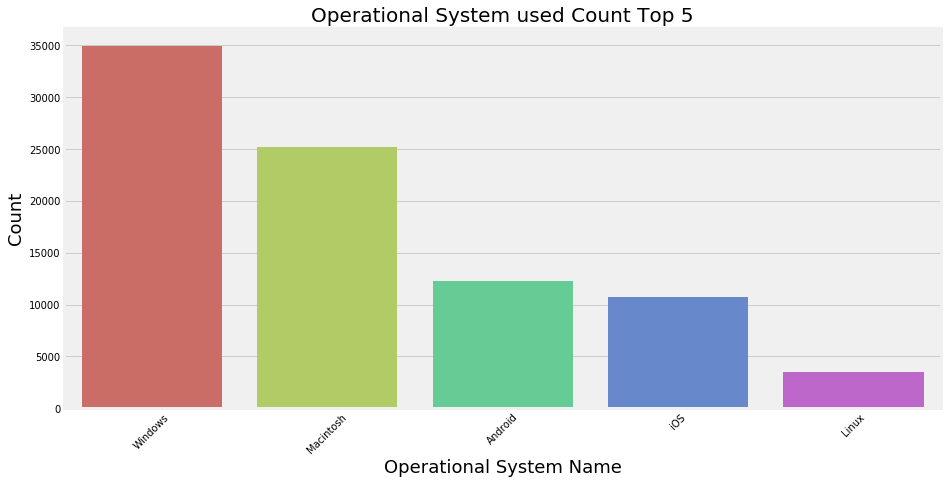

In [50]:
plt.figure(figsize=(14,7))
sns.countplot(df_train[df_train['device.operatingSystem']\
                       .isin(df_train['device.operatingSystem']\
                             .value_counts()[:5].index.values)]['device.operatingSystem'],palette = 'hls')
plt.title("Operational System used Count Top 5", fontsize=20)
plt.xlabel("Operational System Name", fontsize=18)
plt.ylabel("Count", fontsize= 18)
plt.xticks(rotation = 45)
plt.show()